## File handling
- Defining file paths
- Reading the data, skip its header, clean each line of non-numerical characters. Converts the cleaned lines into a Numpy array of floats and compile it intp a 2D array
- Test data is read from file as a string, cleaned and converted into a 1D array (np.fromstring). Then reshaped into a 2D array using .reshape(-1, 2).


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math 

# Define file paths for the data
test_points_path = "C:/Users/utjis/OneDrive - Handelsakademin/Python-Github/Python-Richard-Boden-OPA23/Data/test_points.txt"
pikachu_path = "C:/Users/utjis/OneDrive - Handelsakademin/Python-Github/Python-Richard-Boden-OPA23/Data/pikachu.txt"
pichu_path = "C:/Users/utjis/OneDrive - Handelsakademin/Python-Github/Python-Richard-Boden-OPA23/Data/pichu.txt"

# Function to read data from file and convert it to numpy array
def read_and_convert(file_path):
    data = []
    with open(file_path, 'r') as file:
        # Skip first part (header)
        next(file) # https://stackoverflow.com/questions/4796764/read-file-from-line-2-or-skip-header-row
        for line in file:
            # Clear parantheses and non-numerical
            cleaned_line = line.strip().replace('(', '').replace(')', '') 
            # convert to a numpy array of float using fromstring()
            point = np.fromstring(cleaned_line, dtype=float, sep=',') # https://www.w3resource.com/numpy/array-creation/fromstring.php
            data.append(point) # append the array to the data list
    
    return np.array(data) # Converts list of arrays into 2d numpy array and return it

with open(test_points_path, 'r') as file:
    data_str = file.read()

data_str_cleaned = data_str.replace('(', '').replace(')', '')
# convert the string into a 1d numpy array of float
test_data_np = np.fromstring(data_str_cleaned, dtype=float, sep=', ')
# reformat to 2d-array with 2 columns (x, y)
test_data_np = test_data_np.reshape(-1, 2) # https://stackoverflow.com/questions/12575421/convert-a-1d-array-to-a-2d-array-in-numpy

pikachu_data_np = read_and_convert(pikachu_path)
pichu_data_np = read_and_convert(pichu_path)

## PLOT with test points and Pichu and Pikachu data
- Creates a scatter plot visualizing the data points for Pichu, Pikachu and test samples based on the data given.
- Pichu will be black. Pikachu yellow and test samples will be blue.
- plt... makes the plot look understandable.


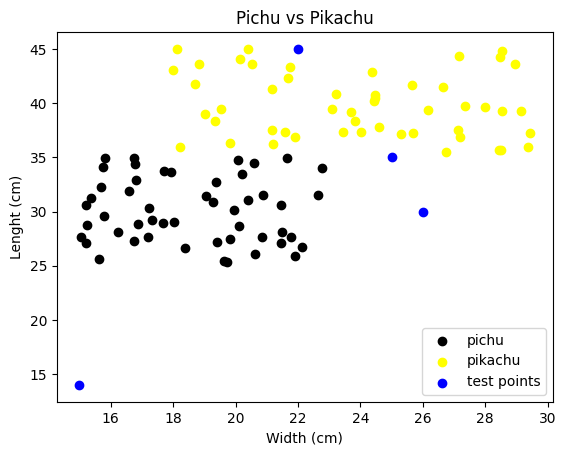

In [5]:
# Scatter plots
# ..._data_np[:, 0] extracts x-values (width)
# ... data_np[:, 1] extracts y-values (lenght)
# color='' sets color to the dots
# label= set the "name" of the plots
plt.scatter(pichu_data_np[:, 0], pichu_data_np[:, 1], color='black', label='pichu')
plt.scatter(pikachu_data_np[:, 0], pikachu_data_np[:, 1], color='yellow', label='pikachu')
plt.scatter(test_data_np[:, 0], test_data_np[:, 1], color='blue', label='test points')

plt.xlabel('Width (cm)')
plt.ylabel('height (cm)')
plt.title('Pichu vs Pikachu')
plt.legend()
plt.show()

## Count the distance between test points
- Defining a function to classify the test points as either Pichu or Pikachu, with an euclidean algorithm.
- np.inf (infinity) ensures that the first distance calc between a test point and pichu/pikachu data will be smaller than its inital value.
- Compare the test points vs pichu/pikachu points using a for loop and if-statement. returns a classification variable.

In [7]:
def classify(test_data_np, pichu_data_np, pikachu_data_np): # Function to classify a test point based on distance
     
    def euclidean(point1, point2): # Calculate the euclidean distance between two points
        x1, y1 = point1
        x2, y2 = point2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    # Initialize variables to keep track of the closest point and its classification.
    closest_distance = np.inf # Chat-gpt helped me here.
    classification = None

    # Compare the test point to all Pichu points.
    for point in pichu_data_np:
        distance = euclidean(test_data_np , point)
        if distance < closest_distance:
            closest_distance = distance
            classification = 'Pichu'
    
    # Repeat comparison for Pikachu points.
    for point in pikachu_data_np:
        distance = euclidean(test_data_np , point)
        if distance < closest_distance:
            closest_distance = distance
            classification = 'Pikachu'
    
    return classification

# Classify each test point and print the results.
for test_point in test_data_np:
    result = classify(test_point, pichu_data_np, pikachu_data_np)
    print(f"Sample with (Width, Height) {test_point} Classified as {result}")

Sample with (Width, Height) [25. 35.] Classified as Pikachu
Sample with (Width, Height) [15. 14.] Classified as Pichu
Sample with (Width, Height) [26. 30.] Classified as Pichu
Sample with (Width, Height) [22. 45.] Classified as Pikachu


## User input (task 1)
- Lets the user inputs data for width and height and returns them as a numpy array.
- Error handling for non-numerical and negative numbers.
- Classifies the data as Pichu or Pikachu.

In [14]:
def user_input(): # Function for user data with error handling.
    while True:
        try:
            width = float(input("Please enter the width: "))
            height = float(input("please enter the height: "))
            if width <= 0 or height <= 0:
                print("Both width and height needs to be positive, please try again")
            else :
                return np.array([width, height])

        except ValueError:
            print("Only numerical values")


user_point = user_input()

result = classify(user_point, pichu_data_np, pikachu_data_np) # Classifies the data as pichu or pikachu.
print(f"User input width {user_point[0]} cm and height {user_point[1]} cm,  classifies as {result} ")





both width and height needs to be positive, please try again
User input width 50.0 cm and height 50.0 cm,  classifies as Pikachu 


## Five closest Knn (Task 2)